## Importing necessary modules 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import graphviz 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Preparing the data

In [2]:
data = pd.read_csv('connect-4.reformated')

def preprocessing_data(data):
    mapper = {'x':1, 'b':0, 'o':-1, 'win':1, 'draw':0, 'loss':-1}
    feature_list = list(data.columns)
    for column_name in feature_list:
        data[column_name] = data[column_name].replace(mapper)
    
def get_feature_and_label(data):
    feature_list = list(data.columns)
    feature = data[feature_list[:-1]]
    label = data[feature_list[-1]]
    return feature, label

In [3]:
def slpit_data(feature, label, train_size):
    feature_train, feature_test, label_train, label_test = train_test_split(feature, label, random_state = 0, train_size = train_size)
    return feature_train, feature_test, label_train, label_test

## Build the model

In [4]:
def build_decision_tree(feature_train, label_train, max_depth):
    model = tree.DecisionTreeClassifier(max_depth = max_depth, random_state = 0)
    model.fit(feature_train, label_train)
    return model

In [5]:
def visualize_decision_tree(model, label_names, train_ratio, max_depth): 
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=label_names,  
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render(("models_visuals/model-"+str(train_ratio)+"-"+str(100-train_ratio)+"-max_depth = "+str(max_depth)))

## Evaluating the model

In [6]:
def get_prediction(model, feature_test):
    pred=model.predict(feature_test)
    return pred

In [7]:
def show_evaluation(label_test, pred):
    print("Decision Tree Classifier report \n", classification_report(label_test, pred))
    cfm=confusion_matrix(label_test, pred)

    sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
    plt.title('Decision Tree Classifier confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label');
    print("The accuracy score is", accuracy_score(label_test, pred))
    return accuracy_score(label_test, pred)

## Experiments

In [8]:
preprocessing_data(data)

def main(data, train_ratio, test_ratio, max_depth = None, accuracy_by_depth = None):
    feature, label = get_feature_and_label(data)
    feature_train, feature_test, label_train, label_test = slpit_data(feature, label, train_ratio/100)
    print("The train set size is", feature_train.shape[0])
    print("The test set size is", feature_test.shape[0])
    model = build_decision_tree(feature_train, label_train, max_depth = max_depth)
    visualize_decision_tree(model, feature_train.columns, train_ratio, max_depth)
    pred = get_prediction(model, feature_test)
    acc = show_evaluation(label_test, pred)
    if accuracy_by_depth is not None:
        accuracy_by_depth[max_depth] = acc

#### 40/60 (train/test) split ratio:

The train set size is 27022
The test set size is 40535
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.66      0.65      0.65      9961
           0       0.26      0.26      0.26      3846
           1       0.85      0.85      0.85     26728

    accuracy                           0.75     40535
   macro avg       0.59      0.59      0.59     40535
weighted avg       0.74      0.75      0.75     40535

The accuracy score is 0.746095966448748


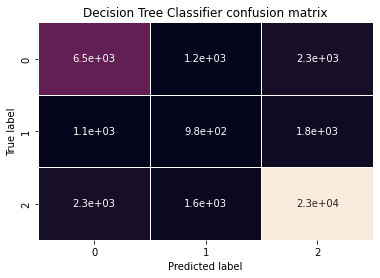

In [9]:
main(data, 40, 60)

#### 60/40 (train/test) split ratio:

The train set size is 40534
The test set size is 27023
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.67      0.68      0.68      6623
           0       0.29      0.29      0.29      2559
           1       0.86      0.86      0.86     17841

    accuracy                           0.76     27023
   macro avg       0.61      0.61      0.61     27023
weighted avg       0.76      0.76      0.76     27023

The accuracy score is 0.7596491877289716


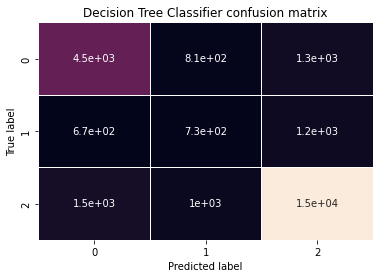

In [10]:
main(data, 60, 40)

#### 80/20 (train/test) split ratio:

The train set size is 54045
The test set size is 13512
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.68      0.68      0.68      3300
           0       0.28      0.27      0.28      1278
           1       0.86      0.86      0.86      8934

    accuracy                           0.76     13512
   macro avg       0.61      0.60      0.60     13512
weighted avg       0.76      0.76      0.76     13512

The accuracy score is 0.7618413262285376


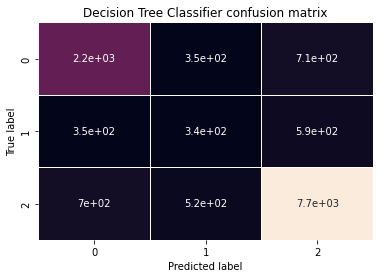

In [11]:
main(data, 80, 20)


#### 90/10 (train/test) split ratio:

The train set size is 60801
The test set size is 6756
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.70      0.70      0.70      1674
           0       0.27      0.24      0.26       612
           1       0.86      0.87      0.87      4470

    accuracy                           0.77      6756
   macro avg       0.61      0.61      0.61      6756
weighted avg       0.77      0.77      0.77      6756

The accuracy score is 0.7739786856127886


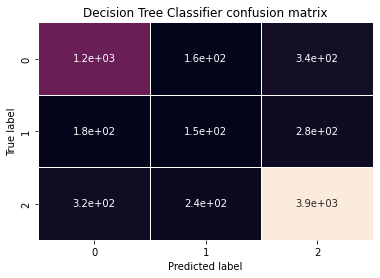

In [12]:
main(data, 90, 10)

## The depth and accuracy of a decision tree

In [13]:
accuracy_by_depth = {}

#### max_depth = None

The train set size is 54045
The test set size is 13512
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.68      0.68      0.68      3300
           0       0.28      0.27      0.28      1278
           1       0.86      0.86      0.86      8934

    accuracy                           0.76     13512
   macro avg       0.61      0.60      0.60     13512
weighted avg       0.76      0.76      0.76     13512

The accuracy score is 0.7618413262285376


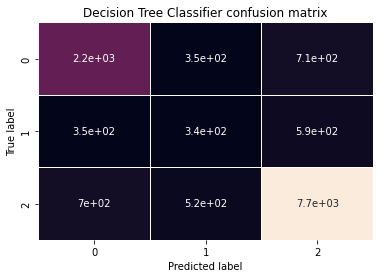

In [14]:
main(data, 80, 20, None, accuracy_by_depth)

#### max_depth = 2

The train set size is 54045
The test set size is 13512
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.52      0.20      0.29      3300
           0       0.00      0.00      0.00      1278
           1       0.69      0.95      0.80      8934

    accuracy                           0.68     13512
   macro avg       0.40      0.38      0.36     13512
weighted avg       0.58      0.68      0.60     13512

The accuracy score is 0.6750296033155714


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

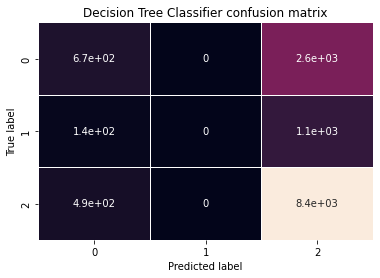

In [15]:
main(data, 80, 20, 2, accuracy_by_depth)

#### max_depth = 3

The train set size is 54045
The test set size is 13512
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.52      0.32      0.39      3300
           0       0.00      0.00      0.00      1278
           1       0.71      0.92      0.80      8934

    accuracy                           0.68     13512
   macro avg       0.41      0.41      0.40     13512
weighted avg       0.60      0.68      0.63     13512

The accuracy score is 0.6835405565423327


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

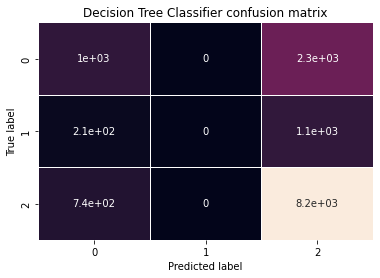

In [16]:
main(data, 80, 20, 3, accuracy_by_depth)

#### max_depth = 4

The train set size is 54045
The test set size is 13512
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.59      0.28      0.38      3300
           0       0.00      0.00      0.00      1278
           1       0.71      0.95      0.81      8934

    accuracy                           0.69     13512
   macro avg       0.43      0.41      0.40     13512
weighted avg       0.61      0.69      0.63     13512

The accuracy score is 0.6931616341030196


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

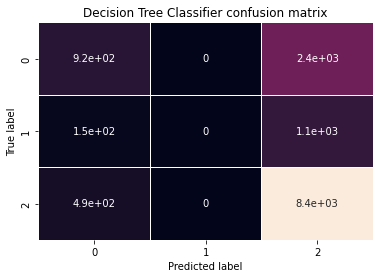

In [17]:
main(data, 80, 20, 4, accuracy_by_depth)

#### max_depth = 5

The train set size is 54045
The test set size is 13512
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.64      0.30      0.41      3300
           0       0.00      0.00      0.00      1278
           1       0.71      0.95      0.82      8934

    accuracy                           0.70     13512
   macro avg       0.45      0.42      0.41     13512
weighted avg       0.63      0.70      0.64     13512

The accuracy score is 0.7044849023090586


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

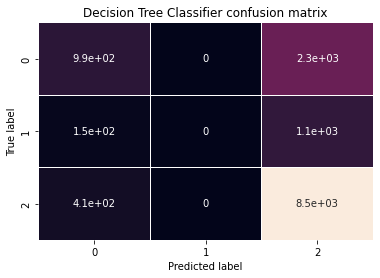

In [18]:
main(data, 80, 20, 5, accuracy_by_depth)

#### max_depth = 6

The train set size is 54045
The test set size is 13512
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.65      0.36      0.46      3300
           0       0.00      0.00      0.00      1278
           1       0.72      0.95      0.82      8934

    accuracy                           0.71     13512
   macro avg       0.46      0.44      0.43     13512
weighted avg       0.64      0.71      0.66     13512

The accuracy score is 0.7138839550029603


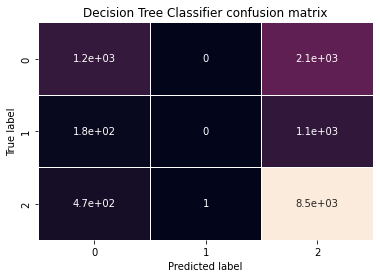

In [19]:
main(data, 80, 20, 6, accuracy_by_depth)

#### max_depth = 7

The train set size is 54045
The test set size is 13512
Decision Tree Classifier report 
               precision    recall  f1-score   support

          -1       0.62      0.45      0.52      3300
           0       0.48      0.01      0.02      1278
           1       0.74      0.93      0.82      8934

    accuracy                           0.72     13512
   macro avg       0.61      0.46      0.45     13512
weighted avg       0.69      0.72      0.67     13512

The accuracy score is 0.7220988750740083


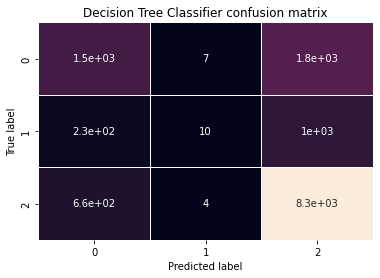

In [20]:
main(data, 80, 20, 7, accuracy_by_depth)

In [21]:
print("The accuracy score by max_depth is:")
for depth in accuracy_by_depth:
    print(f"max_depth = {depth}: {accuracy_by_depth[depth]}")

The accuracy score by max_depth is:
max_depth = None: 0.7618413262285376
max_depth = 2: 0.6750296033155714
max_depth = 3: 0.6835405565423327
max_depth = 4: 0.6931616341030196
max_depth = 5: 0.7044849023090586
max_depth = 6: 0.7138839550029603
max_depth = 7: 0.7220988750740083
